# EDA and Modeling of the Titanic Data Set for Learning

Author: Alex Searle

In [30]:
# Import packages
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
warnings.filterwarnings("ignore")
sns.set_theme(style='darkgrid')

In [2]:
# Read in data
titanic_df = pd.read_csv('Data/train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Getting sense of data
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Get numerical summaries
titanic_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


Need to change some cells to categorical as only fare and age should be numeric

In [5]:
# Get categorical summaries
titanic_df.select_dtypes('object').describe().T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


### Doing some data clean up

In [6]:
# changing Pclass to categorical
titanic_df.Pclass = titanic_df.Pclass.astype('category')
# Chaning Objects to categorical
obj = titanic_df.select_dtypes('object').columns.to_list()
titanic_df[obj] = titanic_df[obj].astype('category')
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    category
 3   Name         891 non-null    category
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    category
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    category
 11  Embarked     889 non-null    category
dtypes: category(6), float64(2), int64(4)
memory usage: 116.1 KB


### EDA

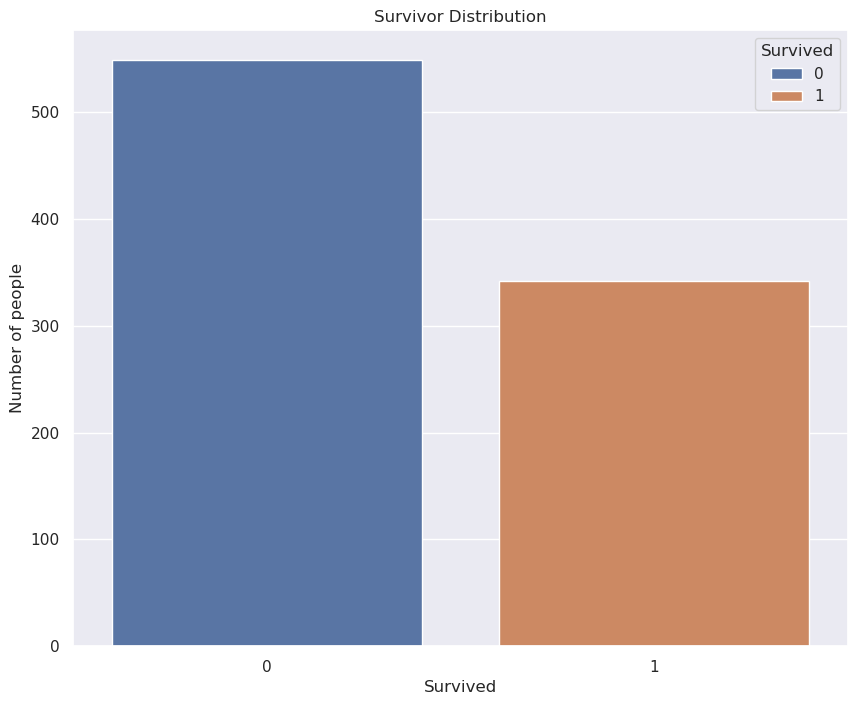

In [7]:
# ploting survivor distribution
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(titanic_df, x='Survived', hue='Survived', ax=ax)
ax.set_xlabel("Survived")
ax.set_ylabel("Number of people")
ax.set_title("Survivor Distribution")
plt.show()

More people died than survived 

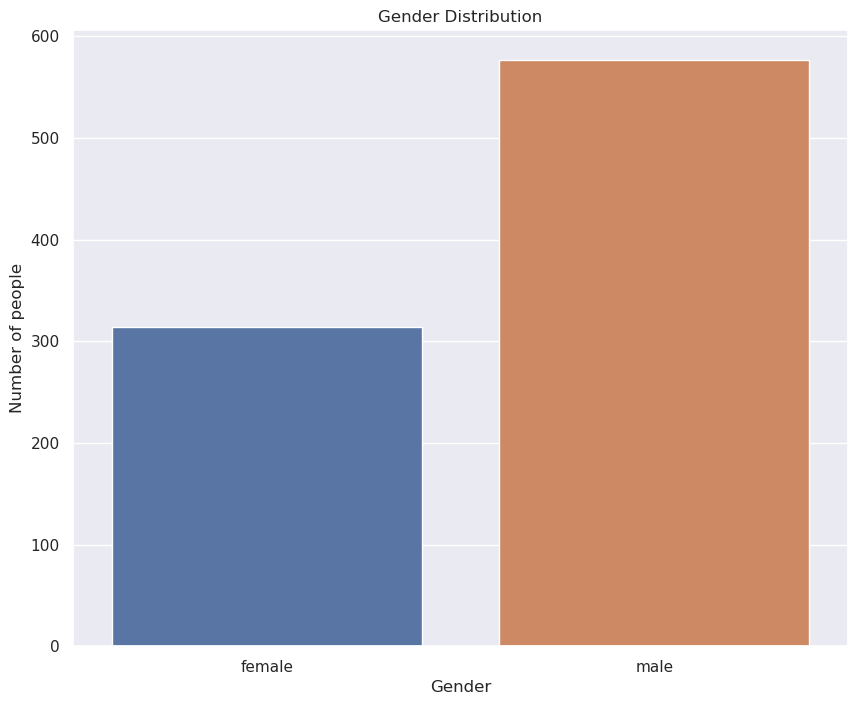

In [8]:
# Gender Distribution
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(titanic_df, x="Sex", hue='Sex', ax=ax)
ax.set_xlabel("Gender")
ax.set_ylabel("Number of people")
ax.set_title("Gender Distribution")
plt.show()

There were more males than females on the titanic so we have to take this into account when looking at counts and other distibutions based off of gender

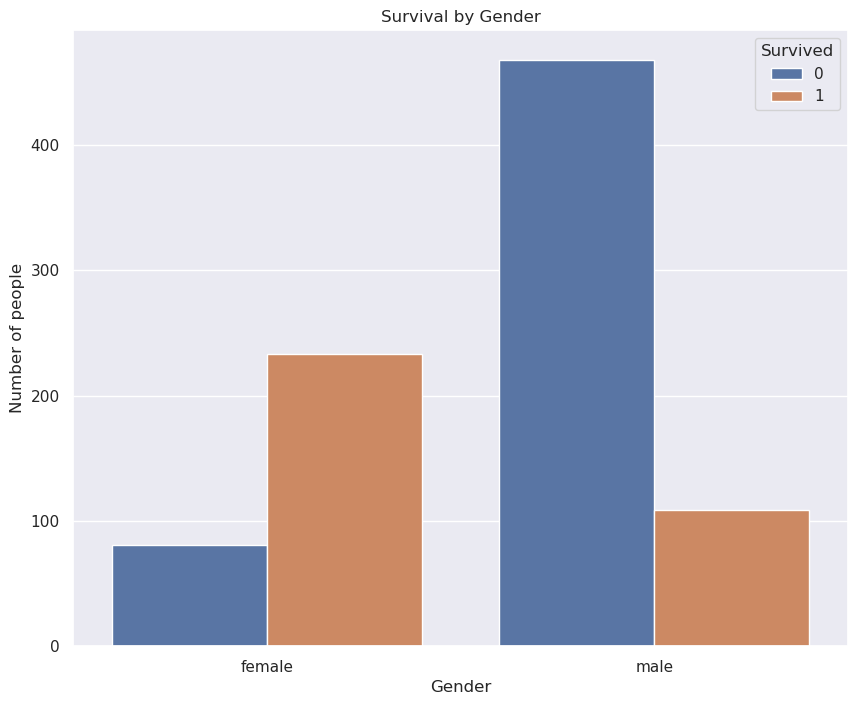

In [9]:
# Ploting survival by gender
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(titanic_df, x='Sex', hue='Survived', ax=ax)
ax.set_xlabel('Gender')
ax.set_ylabel('Number of people')
ax.set_title('Survival by Gender')
plt.show()

This shows that gender can be a good predictor for survival as the distributions between genders are very different showing the females were more likely to survive than males

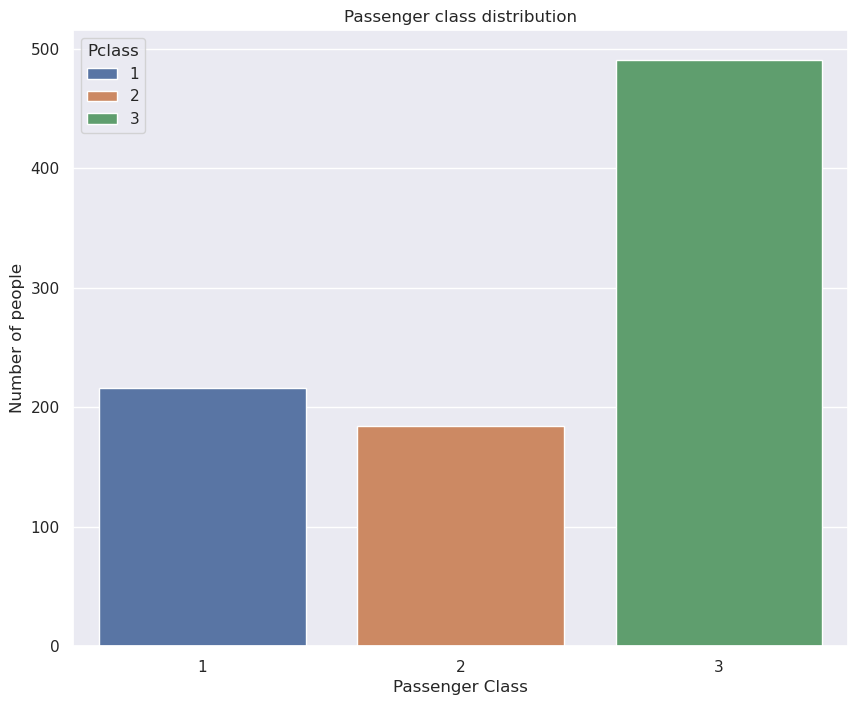

In [10]:
# Distribution of Pclass
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(titanic_df, x='Pclass', hue='Pclass', ax=ax)
ax.set_xlabel('Passenger Class')
ax.set_ylabel('Number of people')
ax.set_title('Passenger class distribution')
plt.show()

There were many more poeple in the 2 passenger class which is the lowest which makes sense we just have to take this into account later

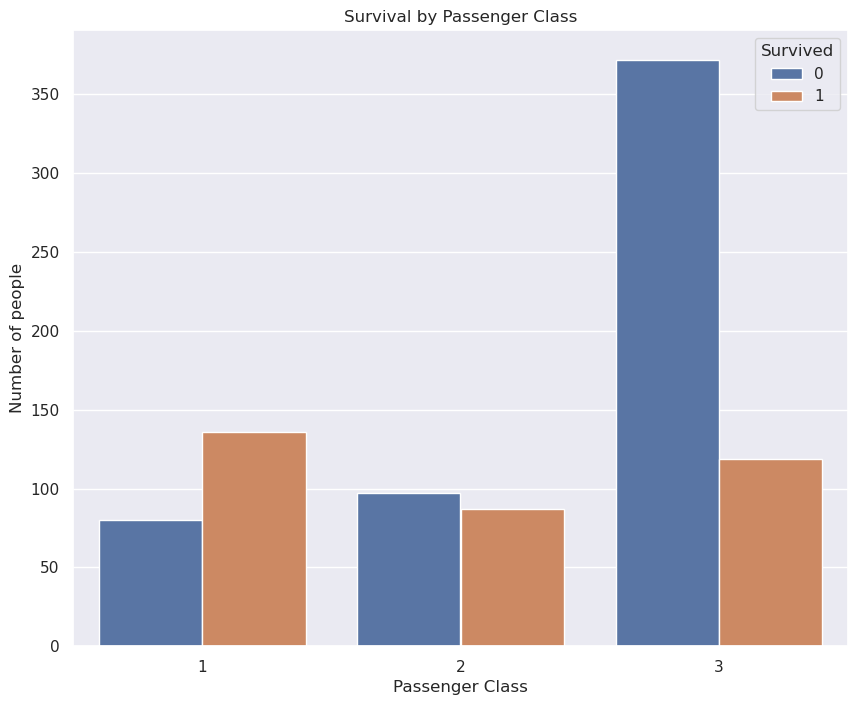

In [11]:
# Survival by pclass
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(titanic_df, x='Pclass', hue='Survived', ax=ax)
ax.set_xlabel('Passenger Class')
ax.set_ylabel('Number of people')
ax.set_title('Survival by Passenger Class')
plt.show()

This shows that passenger class can be a good predictor of survival because the distributions for all 3 of the passenger classes are very different

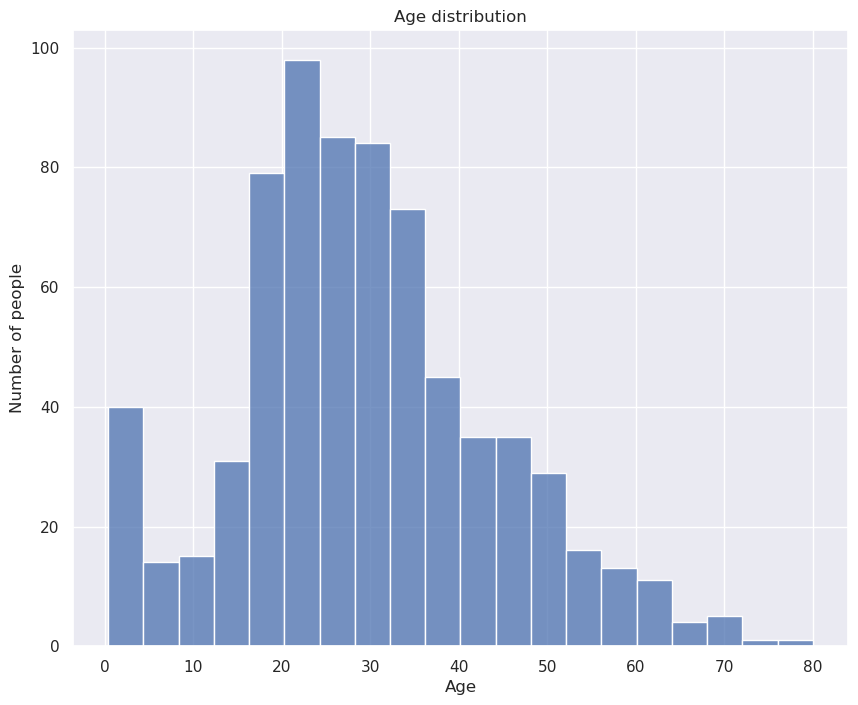

In [12]:
# Age distribtion
fig, ax = plt.subplots(figsize=(10,8))
sns.histplot(titanic_df, x='Age', bins=20)
ax.set_xlabel('Age')
ax.set_ylabel('Number of people')
ax.set_title('Age distribution')
plt.show()

The distribution is slightly right skewed showing that median age would be a metric to understand this data

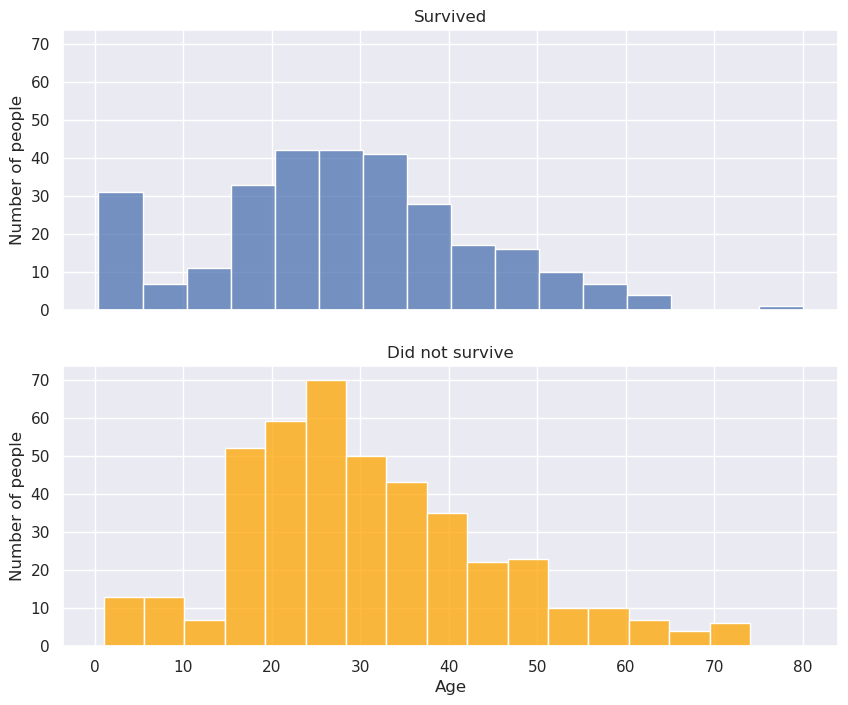

In [13]:
# Age distributions by survival
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,8), sharex=True, sharey=True)
sns.histplot(titanic_df[titanic_df.Survived == 1], x='Age', ax=ax[0])
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Number of people')
ax[0].set_title('Survived')
sns.histplot(titanic_df[titanic_df.Survived == 0], x='Age', ax=ax[1], color='orange')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Number of people')
ax[1].set_title('Did not survive')
plt.show()

Distributions are slighlty different, so this could possibly be used to make predictions but we have better options

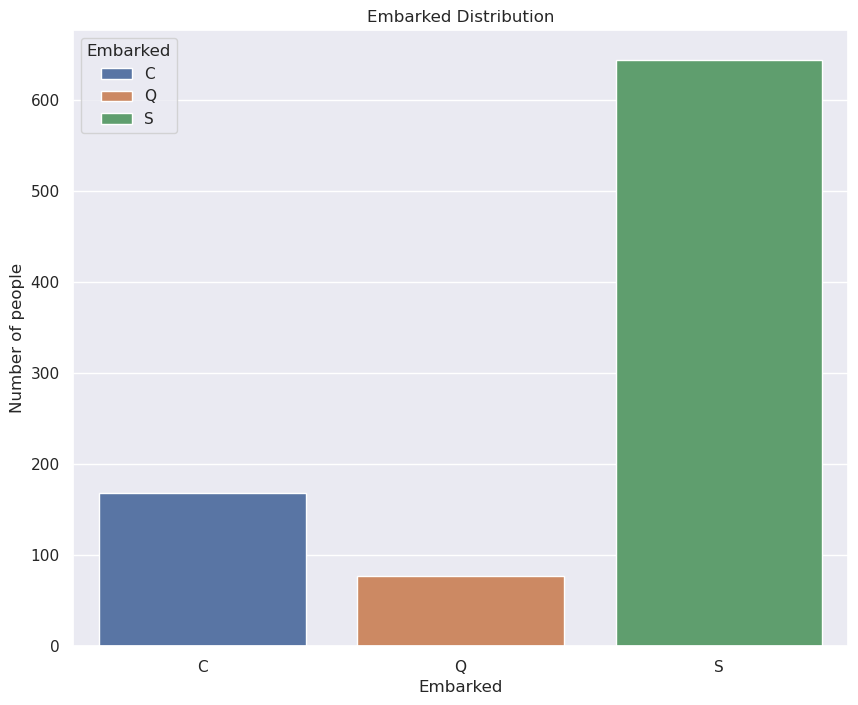

In [14]:
# Embarked distribution
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(titanic_df, x='Embarked', hue='Embarked')
ax.set_xlabel('Embarked')
ax.set_ylabel('Number of people')
ax.set_title('Embarked Distribution')
plt.show()

Most people embarked at S so need to look out for this skew while looking for insights

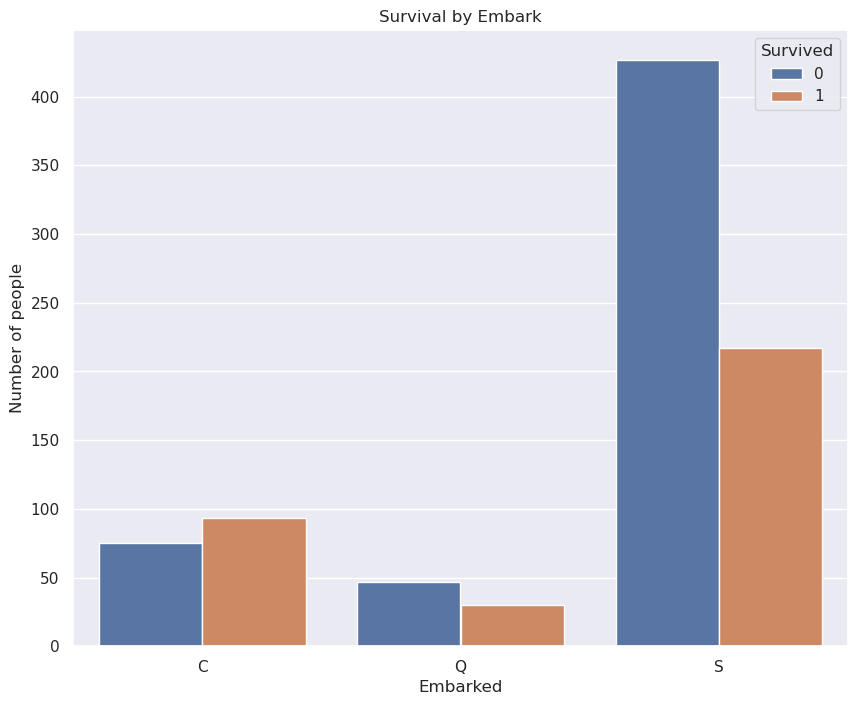

In [15]:
# Survival by Embarked
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(titanic_df, x='Embarked', hue='Survived')
ax.set_xlabel('Embarked')
ax.set_ylabel('Number of people')
ax.set_title('Survival by Embark')
plt.show()

The distributions for embarked are significantly different and shows that this could be a good predictor to use

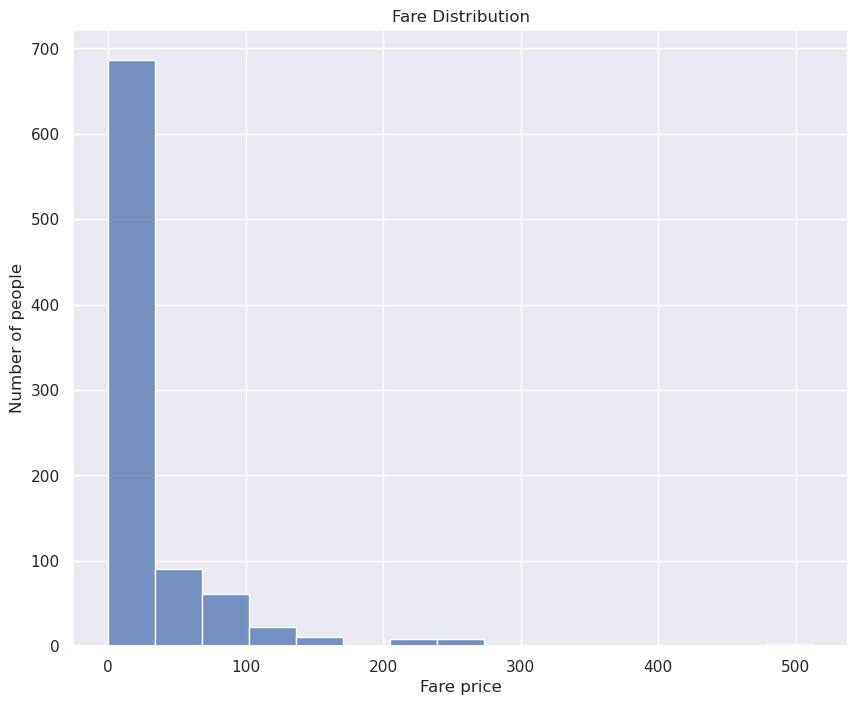

In [16]:
# Fare distribution
fig, ax = plt.subplots(figsize=(10,8))
sns.histplot(titanic_df, x='Fare', bins=15)
ax.set_xlabel('Fare price')
ax.set_ylabel('Number of people')
ax.set_title('Fare Distribution')
plt.show()

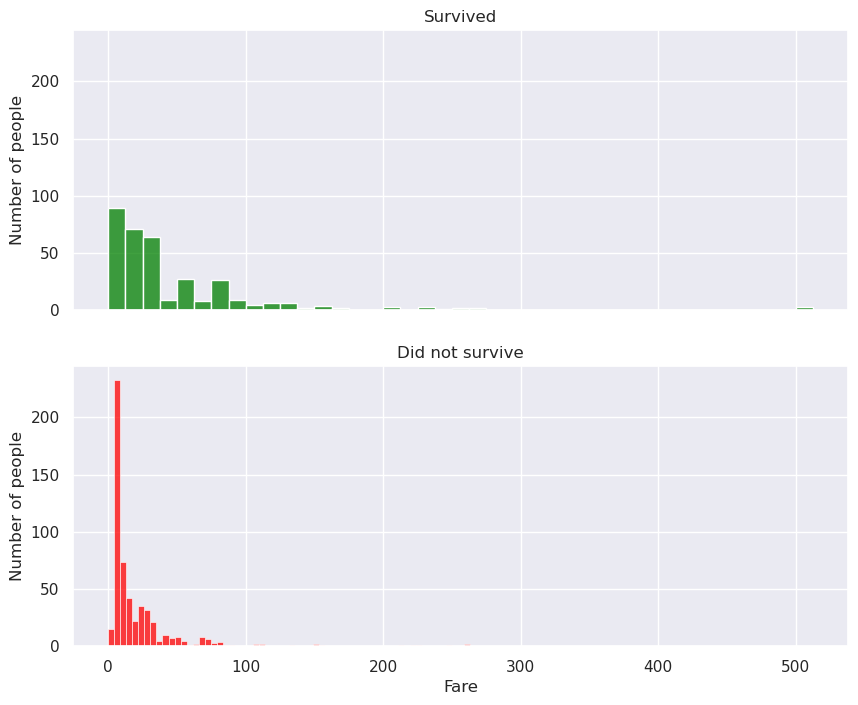

In [17]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,8), sharex=True, sharey=True)
sns.histplot(titanic_df[titanic_df.Survived == 1], x='Fare', ax=ax[0], color='green')
ax[0].set_xlabel('Fare')
ax[0].set_ylabel('Number of people')
ax[0].set_title('Survived')
sns.histplot(titanic_df[titanic_df.Survived == 0], x='Fare', ax=ax[1], color='red')
ax[1].set_xlabel('Fare')
ax[1].set_ylabel('Number of people')
ax[1].set_title('Did not survive')
plt.show()

This doesn't give us very much insight distributions are basically the same

## Feature Engineering

In [18]:
# Is alone
titanic_df['Alone'] = (titanic_df.SibSp == 0) & (titanic_df.Parch == 0)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True


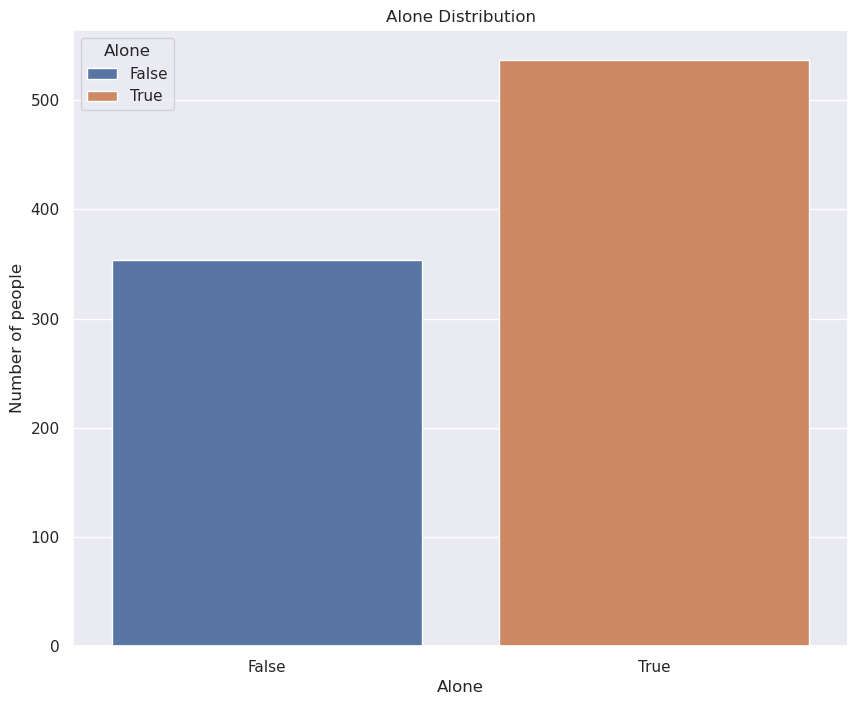

In [19]:
# Alone distribution
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(titanic_df, x='Alone', hue='Alone')
ax.set_xlabel('Alone')
ax.set_ylabel('Number of people')
ax.set_title('Alone Distribution')
plt.show()

There are more people who are alone then there are poeple who are with people on teh titanic which makes sense because most families couldn't afford to send more than one person

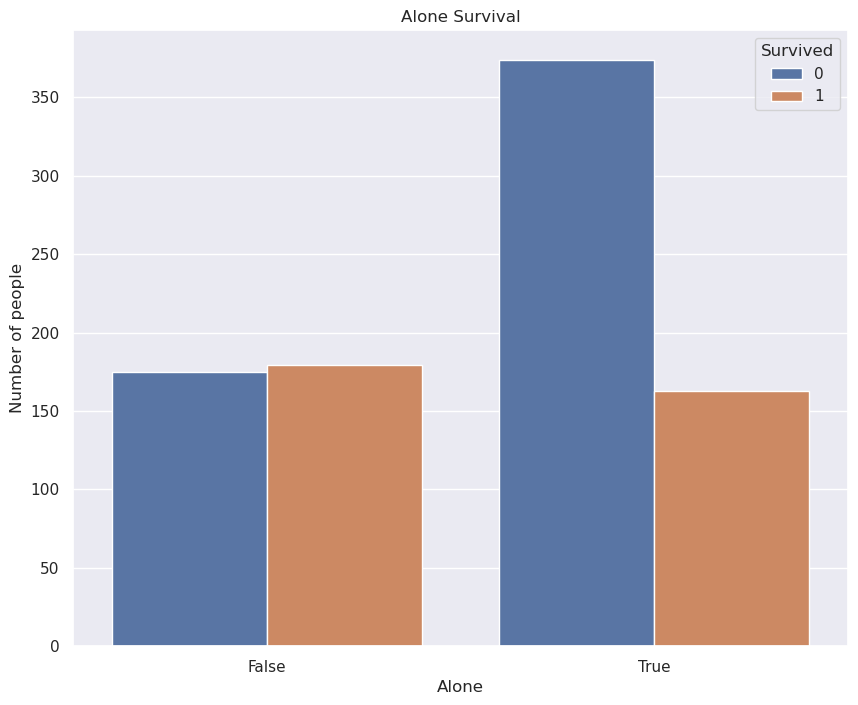

In [20]:
# Alone survival
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(titanic_df, x='Alone', hue='Survived')
ax.set_xlabel('Alone')
ax.set_ylabel('Number of people')
ax.set_title('Alone Survival')
plt.show()

This shows use that people who were not alone were much less likely to die and this could be a good value to predict on

## Modeling

In [24]:
# Decision Tree
y = titanic_df.Survived
features = ['Sex', 'Alone', 'Pclass', 'Embarked']
X = pd.get_dummies(titanic_df[features], drop_first=True).fillna(0)
model1 = DecisionTreeClassifier(max_depth=5, min_samples_leaf=20, random_state=42)

num_folds = 5
scores = cross_val_score(model1, X, y, cv=num_folds, scoring='accuracy')
print('Accuracy scores of each fold: ', [f'{acc:.3f}' for acc in scores])
print(f'Accuracy: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})')

params = {
    'criterion': ['entropy', 'gini', 'log_loss'],
    'max_depth': [3,5,10,15,20],
    'min_samples_leaf': [1, 2, 3, 5, 10, 15, 20, 30],
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01],
}
gridsearch_accuracy = GridSearchCV(DecisionTreeClassifier(), params, cv=5, n_jobs=-1, scoring='accuracy')
gridsearch_accuracy.fit(X, y)
print('Initial score: {:.2f}'.format(gridsearch_accuracy.best_score_))
print('Best parameters from param_grid: {}'.format(gridsearch_accuracy.best_params_))

Accuracy scores of each fold:  ['0.749', '0.820', '0.809', '0.787', '0.815']
Accuracy: 0.796 (+/- 0.052)
Initial score: 0.81
Best parameters from param_grid: {'criterion': 'entropy', 'max_depth': 3, 'min_impurity_decrease': 0, 'min_samples_leaf': 1}


In [31]:
# RandomForest
y = titanic_df.Survived
features = ['Sex', 'Alone', 'Pclass', 'Embarked']
X = pd.get_dummies(titanic_df[features], drop_first=True).fillna(0)
model1 = RandomForestClassifier(max_depth=5, min_samples_leaf=20, random_state=42)

num_folds = 5
scores = cross_val_score(model1, X, y, cv=num_folds, scoring='accuracy')
print('Accuracy scores of each fold: ', [f'{acc:.3f}' for acc in scores])
print(f'Accuracy: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})')

params = {
    'n_estimators': [10, 20, 50, 75, 100, 150, 200],
    'criterion': ['entropy', 'gini', 'log_loss'],
    'max_depth': [3,5,10,15,20],
    'min_samples_leaf': [1, 2, 3, 5, 10, 15, 20, 30],
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01],
}
gridsearch_accuracy = GridSearchCV(RandomForestClassifier(), params, cv=5, n_jobs=-1, scoring='accuracy')
gridsearch_accuracy.fit(X, y)
print('Initial score: {:.2f}'.format(gridsearch_accuracy.best_score_))
print('Best parameters from param_grid: {}'.format(gridsearch_accuracy.best_params_))

Accuracy scores of each fold:  ['0.804', '0.820', '0.809', '0.787', '0.815']
Accuracy: 0.807 (+/- 0.023)


ValueError: Invalid parameter 'max_iter' for estimator RandomForestClassifier(criterion='entropy', max_depth=3). Valid parameters are: ['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'].

In [ ]:
# MLPClassifier
params = {
    'hidden_layer_sizes': [(100,), (50, 25), (30, 15), (20,10)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [.0001, .001, .01, .1, .5, 1, 5, 10],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'max_iter': [200, 300, 400, 500, 600],
}
gridsearch_accuracy = GridSearchCV(MLPClassifier(), params, cv=5, n_jobs=-1, scoring='accuracy')
gridsearch_accuracy.fit(X, y)
print('Initial score: {:.2f}'.format(gridsearch_accuracy.best_score_))
print('Best parameters from param_grid: {}'.format(gridsearch_accuracy.best_params_))

/home/alexsearle/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alexsearle/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alexsearle/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alexsearle/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alexsearle/ana